# Projet IA

## Introduction

L'entreprise de produits pharmaceutiques HumanForYou basée en Inde emploie environ 4000 personnes. Cependant, chaque année elle subit un turn-over d'environ 15% de ses employés nécessitant de retrouver des profils similaires sur le marché de l'emploi.

La direction trouve que ce niveau de turn-over n'est pas bon pour l'entreprise car :

- Les projets sur lesquels étaient les employés quittant la société prennent du retard ce qui nuit à la réputation de l'entreprise auprès de ses clients et partenaires.

- Un service de ressources humaines de taille conséquente doit être conservé car il faut avoir les moyens de trouver les nouvelles recrues.

- Du temps est perdu à l'arrivée des nouveaux employés car ils doivent très souvent être formés et ont besoin de temps pour devenir pleinement opérationnels dans leur nouvel environnement.

***Le direction fait donc appel à vous, spécialistes de l'analyse de données, pour déterminer les facteurs ayant le plus d'influence sur ce taux de turn-over et lui proposer des modèles afin d'avoir des pistes d'amélioration pour donner à leurs employés l'envie de rester.***




## Gestion Execution et images

In [13]:
# imports
import numpy as np
import os

from numpy.random import default_rng
# stabilité du notebook d'une exécution à l'autre
random=default_rng(42) 

# jolies figures directement dans le notebook
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# où sauver les figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "workflowDS"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID) # le dossier doit exister

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Import des CSV

In [14]:
import pandas as pd
import os

EMPLOYEE_SURVEY_DATA_PATH = os.path.join("data")
GENERAL_DATA_PATH = os.path.join("data")
MANAGER_SURVEY_DATA_PATH = os.path.join("data")
IN_TIME_PATH = os.path.join("data")
OUT_TIME_PATH = os.path.join("data")

def employee_survey_data(employee_path=EMPLOYEE_SURVEY_DATA_PATH):
    csv_path = os.path.join(employee_path, "employee_survey_data.csv")
    return pd.read_csv(csv_path)

def general_data(data_path=GENERAL_DATA_PATH):
    csv_path = os.path.join(data_path, "general_data.csv")
    return pd.read_csv(csv_path) 

def manager_survey_data(manager_survey_path=MANAGER_SURVEY_DATA_PATH):
    csv_path = os.path.join(manager_survey_path, "manager_survey_data.csv")
    return pd.read_csv(csv_path) 

def out_time_data(out_time_path=OUT_TIME_PATH):
    csv_path = os.path.join(out_time_path, "out_time.csv")
    return pd.read_csv(csv_path) 

def in_time_data(in_time_path=IN_TIME_PATH):
    csv_path = os.path.join(in_time_path, "in_time.csv")
    return pd.read_csv(csv_path) 

In [15]:
employee = employee_survey_data()
general = general_data()
manager = manager_survey_data()
outTime = out_time_data()
inTime = in_time_data()

## Preparation des heures d'arrivés et de sorties

In [16]:
inTimeCpy = inTime.copy()
inTimeCpy = inTimeCpy.fillna(0)
outTimeCpy = outTime.copy()
outTimeCpy = outTimeCpy.fillna(0)

for k in range(2,len(inTimeCpy.columns)):
    inTimeCpy[inTimeCpy.columns[k]] = pd.to_datetime(inTimeCpy[inTimeCpy.columns[k]], format='%Y-%m-%d %H:%M:%S')
for k in range(2,len(outTimeCpy.columns)):
    outTimeCpy[outTimeCpy.columns[k]] = pd.to_datetime(outTimeCpy[outTimeCpy.columns[k]], format='%Y-%m-%d %H:%M:%S')

deltaTime = outTimeCpy-inTimeCpy

deltaTime.head()

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,0,0.0,0 days 07:12:30,0 days 07:11:23,0 days 07:24:39,0 days 07:00:24,0 days 07:17:23,0 days 07:29:04,0 days 07:15:46,0 days 07:49:52,...,0 days 00:00:00,0 days 07:20:21,0 days 07:23:45,0 days 06:30:17,0 days 07:35:47,0 days,0 days 07:46:26,0 days 07:18:54,0 days 07:46:44,0 days 07:04:49
1,0,0.0,0 days 08:06:33,0 days 07:27:17,0 days 00:00:00,0 days 07:23:49,0 days 07:25:00,0 days 07:09:03,0 days 07:36:41,0 days 07:16:44,...,0 days 07:54:11,0 days 07:45:14,0 days 07:42:44,0 days 07:26:08,0 days 00:00:00,0 days,0 days 07:36:53,0 days 07:58:57,0 days 07:59:10,0 days 08:13:38
2,0,0.0,0 days 06:41:33,0 days 07:15:56,0 days 06:24:19,0 days 06:45:54,0 days 07:20:42,0 days 06:51:41,0 days 07:25:07,0 days 06:59:59,...,0 days 06:47:09,0 days 07:09:49,0 days 06:48:06,0 days 06:43:49,0 days 06:50:59,0 days,0 days 07:01:26,0 days 07:26:20,0 days 07:32:20,0 days 06:47:11
3,0,0.0,0 days 07:20:18,0 days 07:17:31,0 days 06:56:35,0 days 06:55:10,0 days 06:51:03,0 days 07:11:35,0 days 06:59:55,0 days 07:18:23,...,0 days 07:37:45,0 days 06:50:48,0 days 07:19:35,0 days 07:24:49,0 days 07:05:06,0 days,0 days 07:26:50,0 days 07:25:00,0 days 07:21:59,0 days 07:07:59
4,0,0.0,0 days 08:03:20,0 days 07:59:17,0 days 07:40:57,0 days 07:48:22,0 days 07:39:44,0 days 07:43:18,0 days 08:21:54,0 days 08:15:26,...,0 days 07:54:13,0 days 07:39:54,0 days 07:57:27,0 days 07:47:13,0 days 08:14:58,0 days,0 days 07:39:44,0 days 08:16:07,0 days 07:57:12,0 days 08:01:05


Calcul de la moyenne des temps de travail par employés

In [18]:
meanWorkingTime = pd.DataFrame(data={'EmployeeID': [], 'MeanWorkingTime': []})

for row in range(len(deltaTime)):
    tempRow={'EmployeeID':0, 'MeanWorkingTime':0}
    mean = 0
    for col in range(1,len(deltaTime.columns)):
        tempRow['EmployeeID'] = int(inTime[inTime.columns[0]][row])
        if(deltaTime[deltaTime.columns[col]][row] != 0):
            if(mean != 0):
                mean = (mean+deltaTime[deltaTime.columns[col]][row])/2
            else:
                mean = deltaTime[deltaTime.columns[col]][row]
    tempRow['MeanWorkingTime'] = mean.total_seconds()
    meanWorkingTime = meanWorkingTime.append(tempRow, ignore_index=True)

meanWorkingTime.head()

,EmployeeID,MeanWorkingTime
0,1.0,25562.179418
1,2.0,27729.614998
2,3.0,24697.310763
3,4.0,25293.129258
4,5.0,27940.867653


# Merge de Employee/General/Manager

In [19]:
merge= employee.merge( general, on='EmployeeID')
merge2 = merge.merge(manager, on='EmployeeID')
merge3 = merge2.merge(meanWorkingTime, on='EmployeeID')

workingMerge = merge3
#merge2.head() 
#merge2.info()
merge3.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   EnvironmentSatisfaction  4385 non-null   float64
 2   JobSatisfaction          4390 non-null   float64
 3   WorkLifeBalance          4372 non-null   float64
 4   Age                      4410 non-null   int64  
 5   Attrition                4410 non-null   object 
 6   BusinessTravel           4410 non-null   object 
 7   Department               4410 non-null   object 
 8   DistanceFromHome         4410 non-null   int64  
 9   Education                4410 non-null   int64  
 10  EducationField           4410 non-null   object 
 11  EmployeeCount            4410 non-null   int64  
 12  Gender                   4410 non-null   object 
 13  JobLevel                 4410 non-null   int64  
 14  JobRole                 

## Visualisation des champs

In [ ]:
workingMerge.head

## Table visualisation Info et histogramme 

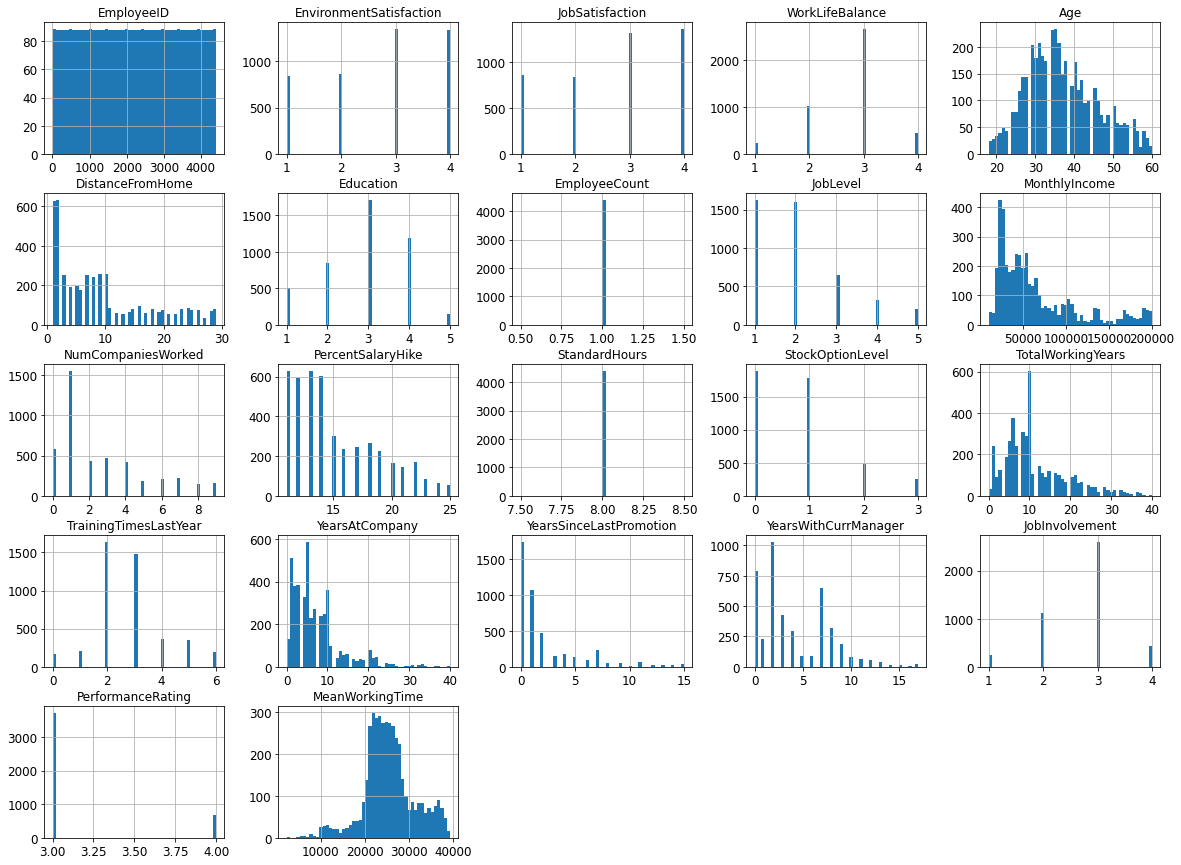

In [20]:
#graph hist
workingMerge.hist(bins=50, figsize=(20,15))
plt.show()

In [21]:
#valeur dans un champs
workingMerge["MeanWorkingTime"].value_counts()

22841.840687    1
37395.913864    1
29495.729567    1
38421.185575    1
22322.380494    1
               ..
25373.547382    1
21296.438931    1
22732.781119    1
25293.415928    1
25041.098071    1
Name: MeanWorkingTime, Length: 4410, dtype: int64

# Classification Ascendante Hiérarchique et dendogramme


In [22]:
from sklearn.preprocessing import OrdinalEncoder
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

X = workingMerge.copy() # A new copy of data set

#Drop rows with Nan
X.dropna(inplace=True)

#remplace Y/N to 0/1
X.Over18.replace(to_replace=dict(Y=1, N=0), inplace=True)
X.Attrition.replace(to_replace=dict(Yes=1, No=0), inplace=True)

#remplace gender male=1 / female=0
X.Gender.replace(to_replace=dict(Male=1, Female=0), inplace=True)

#JobRole
ordinal_encoder = OrdinalEncoder()
X.JobRole = ordinal_encoder.fit_transform(X[["JobRole"]])

#MaritalStatus
ordinal_encoder = OrdinalEncoder()
X.MaritalStatus = ordinal_encoder.fit_transform(X[["MaritalStatus"]])


X.drop("BusinessTravel", axis=1, inplace=True)
X.drop("Department", axis=1, inplace=True)
X.drop("EducationField", axis=1, inplace=True)
X.dropna(inplace=True)

#Visualisation
pd.set_option('display.max_columns', None)
X.head()

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,DistanceFromHome,Education,EmployeeCount,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,MeanWorkingTime
0,1,3.0,4.0,2.0,51,0,6,2,1,0,1,0.0,1.0,131160,1.0,1,11,8,0,1.0,6,1,0,0,3,3,25562.179418
1,2,3.0,2.0,4.0,31,1,10,1,1,0,1,6.0,2.0,41890,0.0,1,23,8,1,6.0,3,5,1,4,2,4,27729.614998
2,3,2.0,2.0,1.0,32,0,17,4,1,1,4,7.0,1.0,193280,1.0,1,15,8,3,5.0,2,5,0,3,3,3,24697.310763
3,4,4.0,4.0,3.0,38,0,2,5,1,1,3,1.0,1.0,83210,3.0,1,11,8,3,13.0,5,8,7,5,2,3,25293.129258
4,5,4.0,1.0,3.0,32,0,10,1,1,1,1,7.0,2.0,23420,4.0,1,12,8,2,9.0,2,6,0,4,3,3,27940.867653


In [23]:
X

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,DistanceFromHome,Education,EmployeeCount,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,MeanWorkingTime
0,1,3.0,4.0,2.0,51,0,6,2,1,0,1,0.0,1.0,131160,1.0,1,11,8,0,1.0,6,1,0,0,3,3,25562.179418
1,2,3.0,2.0,4.0,31,1,10,1,1,0,1,6.0,2.0,41890,0.0,1,23,8,1,6.0,3,5,1,4,2,4,27729.614998
2,3,2.0,2.0,1.0,32,0,17,4,1,1,4,7.0,1.0,193280,1.0,1,15,8,3,5.0,2,5,0,3,3,3,24697.310763
3,4,4.0,4.0,3.0,38,0,2,5,1,1,3,1.0,1.0,83210,3.0,1,11,8,3,13.0,5,8,7,5,2,3,25293.129258
4,5,4.0,1.0,3.0,32,0,10,1,1,1,1,7.0,2.0,23420,4.0,1,12,8,2,9.0,2,6,0,4,3,3,27940.867653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4404,4405,3.0,4.0,3.0,29,0,4,3,1,0,2,1.0,2.0,35390,1.0,1,18,8,0,6.0,2,6,1,5,2,3,25716.671099
4405,4406,4.0,1.0,3.0,42,0,5,4,1,0,1,6.0,2.0,60290,3.0,1,17,8,1,10.0,5,3,0,2,3,3,30313.341786
4406,4407,4.0,4.0,3.0,29,0,2,4,1,1,1,2.0,0.0,26790,2.0,1,15,8,0,10.0,2,3,0,2,2,3,21099.947140
4407,4408,1.0,3.0,3.0,25,0,25,2,1,1,2,7.0,1.0,37020,0.0,1,20,8,0,5.0,4,4,1,2,3,4,24140.167940


## Dendogramme

In [ ]:
plt.figure(figsize=(10, 7))
dendrogram(linkage(X, method='ward'), orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.show()

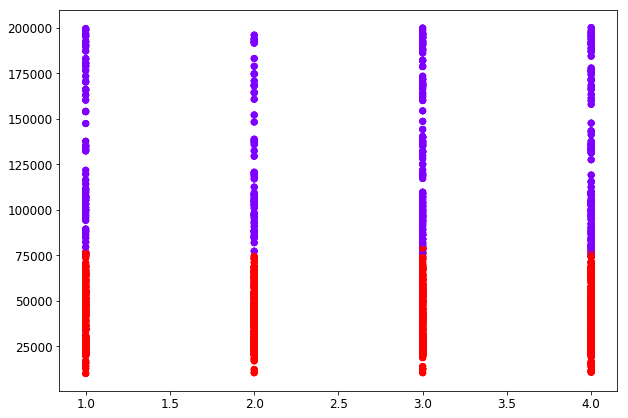

In [121]:
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(X)
plt.figure(figsize=(10, 7))
plt.scatter(X['JobSatisfaction'],X['MeanWorkingTime'], c=cluster.labels_, cmap='rainbow')
plt.show()